<a href="https://colab.research.google.com/github/MDRumman2019/PDS-11-25/blob/main/project2_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df1=pd.read_csv('term-test-1-result.csv')
df2=pd.read_csv('term-test-2-result.csv')

In [2]:
df=pd.merge(df1,df2,on=['Registration Number','Name'])
df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks
0,REG001,Md. Abdul Rahman,75,80
1,REG002,Md. Aminul Islam,82,78
2,REG003,Md. Anwar Hossain,68,72
3,REG004,Md. Ashraf Ali,90,88
4,REG005,Md. Imran Hossain,77,81


In [3]:
df["Best_term_test_marks"]=df.loc[:,["TT-1 Marks","TT-2 Marks"]].max(axis=1)
df["Average_term_test_marks"]=df.loc[:,["TT-1 Marks","TT-2 Marks"]].mean(axis=1)

In [4]:
df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks,Best_term_test_marks,Average_term_test_marks
0,REG001,Md. Abdul Rahman,75,80,80,77.5
1,REG002,Md. Aminul Islam,82,78,82,80.0
2,REG003,Md. Anwar Hossain,68,72,72,70.0
3,REG004,Md. Ashraf Ali,90,88,90,89.0
4,REG005,Md. Imran Hossain,77,81,81,79.0


In [5]:
df.drop(["TT-1 Marks","TT-2 Marks"],axis=1,inplace=True)

In [6]:
df.to_csv("final term test result.csv",index=False)


In [7]:
from google.colab import files
files.download("final term test result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
import numpy as np
y=df.loc[:,"Average_term_test_marks"].values
x=np.array(df.index.tolist())
z=np.stack((x,y),axis=1)

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

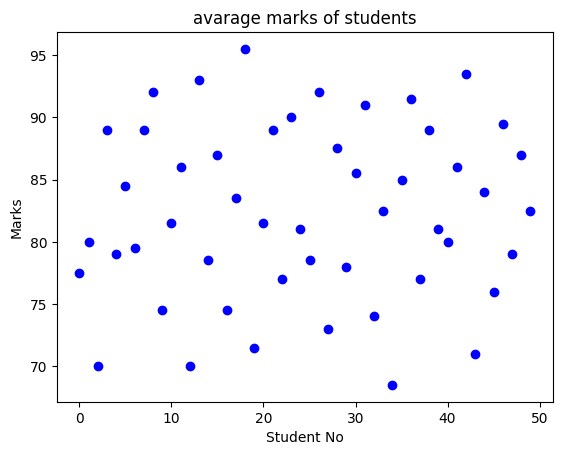

In [10]:
plt.scatter(x=x,y=y,color="blue")
plt.xlabel("Student No")
plt.ylabel("Marks")
plt.title("avarage marks of students")
plt.show()

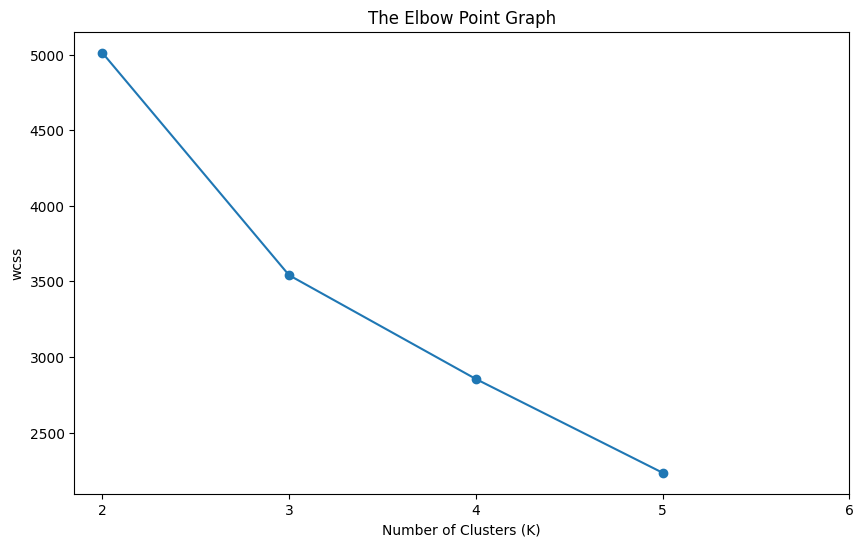

In [22]:
wcss=[]
for i in range(2,6):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
  kmeans.fit(z)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(2,6), wcss)
plt.scatter(range(2,6), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.xticks([2,3,4,5,6])
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(z)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [13]:
kmeans.cluster_centers_

array([[26.5       , 81.28125   ],
       [ 9.        , 82.34210526],
       [42.        , 83.46666667]])

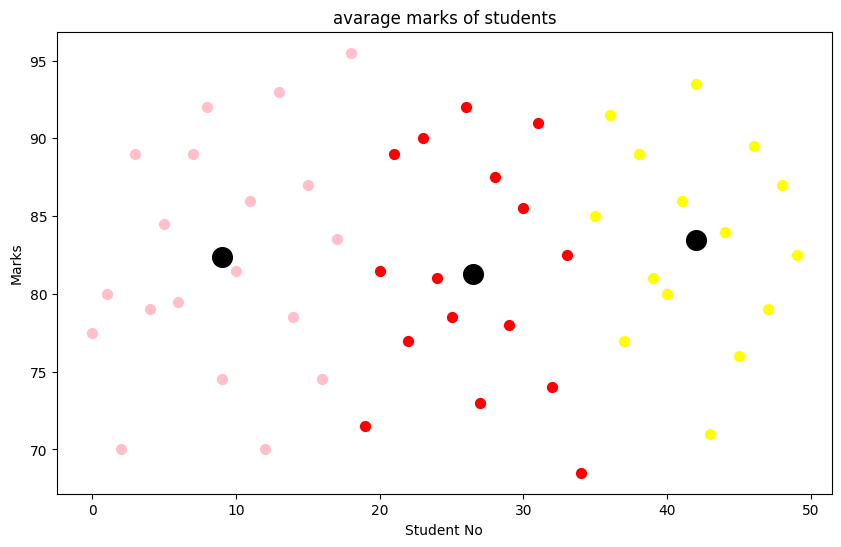

In [14]:

plt.figure(figsize=(10,6))
plt.scatter(z[Y==0,0], z[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(z[Y==1,0], z[Y==1,1], s=50, c='pink', label='Cluster 2')
plt.scatter(z[Y==2,0], z[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.xlabel("Student No")
plt.ylabel("Marks")
plt.title("avarage marks of students")
plt.show()